## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, how='outer', on= 'Mouse ID')
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_df = merge_df[merge_df['Mouse ID'] != 'g989'] 
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats_df = clean_df.groupby('Drug Regimen')
tumor_mean = stats_df['Tumor Volume (mm3)'].mean()
tumor_median = stats_df['Tumor Volume (mm3)'].median()
tumor_stdev = stats_df['Tumor Volume (mm3)'].std()
tumor_sem = stats_df['Tumor Volume (mm3)'].sem()
tumor_var = stats_df['Tumor Volume (mm3)'].var()

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame({'Mean' : tumor_mean, 'Median': tumor_median, 'Variance' : tumor_var,
                             'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})
summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single li
clean_df.groupby("Drug Regimen").aggregate({'Tumor Volume (mm3)': ['mean','median', 'var',
                                                                  'std', 'sem']})




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Treatment Regimen Total Measurements')

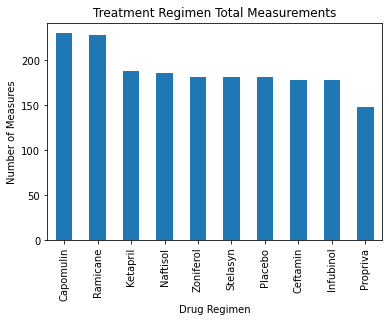

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.5)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measures")
bar_plot.set_title("Treatment Regimen Total Measurements")

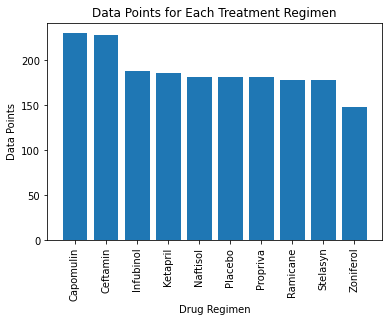

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
datapoints = clean_df['Drug Regimen'].value_counts()
x_ax = np.arange(len(datapoints))

ticklocation = [value for value in x_ax]

plt.bar(x_ax,datapoints )
plt.xticks( ticklocation, summary_table.index, rotation="vertical")
#set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.title('Data Points for Each Treatment Regimen')



plt.show()



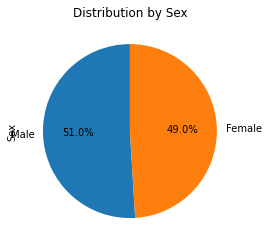

In [11]:

# Identify distribution of data by sex
data = clean_df['Sex'].value_counts()

pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')


Text(0.5, 1.0, 'Distribution by Sex')

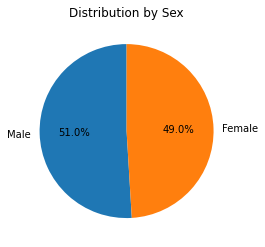

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_df['Sex'].value_counts()

plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
last_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, last_time, on='Mouse ID')
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    filter_df = merge_df.loc[merge_df['Drug Regimen'] == drug]
    
    # add subset 
    final_tumor = filter_df.loc[filter_df['Timepoint']== filter_df['max_timepoint']]
    data = final_tumor['Tumor Volume (mm3)']
    
    tumor_vol_df.append(data)
    
    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers= (data.loc[(final_tumor['Tumor Volume (mm3)'] >= upper_bound) | 
     
                        (final_tumor['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    
    print(drug,
    iqr,
    lower_bound,
    upper_bound)

Capomulin 7.781863460000004 20.70456164999999 51.83201549
Ramicane 9.098536719999998 17.912664470000003 54.30681135
Infubinol 11.477135160000003 36.83290494999999 82.74144559000001
Ceftamin 15.577752179999997 25.355449580000002 87.66645829999999


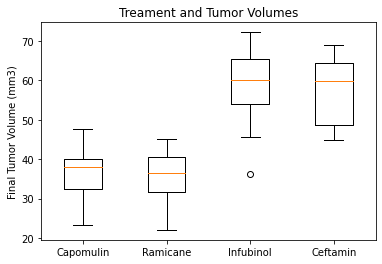

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_df)

plt.title('Treament and Tumor Volumes')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

In [24]:
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


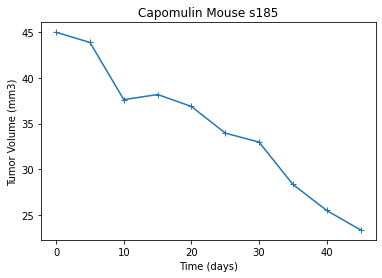

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_df.loc[clean_df['Mouse ID'] == 's185']

plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = '+')

# labels
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mouse s185")

plt.show()

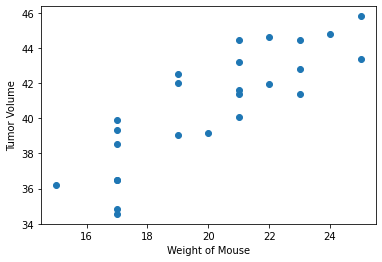

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

mouse_weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

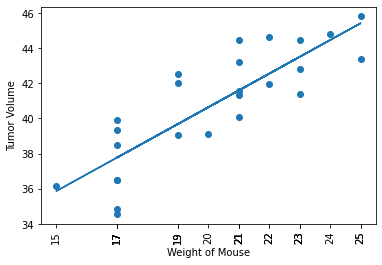

pearsons r = 0.8419363424694717


In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight,tumor_volume)[0]

m, b, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      

y = m * mouse_weight + b

plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,y)
plt.xticks(mouse_weight, rotation=90)
plt.show()

print(f'pearsons r = {correlation}')